# Check Properties of the CLOUD library
0.) Check Concentrations  
1.) Gene/target/transporter/enzyme/carrier annotation  
2.) KeGG pathway targeted  
3.) ATC (prescription) classes covered  

### Check concentrations

In [24]:
fp = open('../data/CLOUD_Description/CLOUD_Table_wConc.csv')
fp.next()
concs = []
for line in fp:
    tmp = line.strip().split(',')
    concs.append(float(tmp[3]))
#plt.hist(concs)
#plt.show()


bins = [0,0.01,0.1,1,10,100,1000,10000000]

#a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#bins=[0,5,10]

binarized_results = numpy.histogram(concs, bins=bins)[0]
plt.bar(range(0,len(binarized_results)),binarized_results, color = '#40B9D3')
plt.xlabel('Conc Range [uM]')
plt.ylabel('Number of drugs')
plt.xticks([0,1,2,3,4,5,6],['<0.01','0.01 - 0.1','0.1 - 1','1 - 10','10 - 100','100 - 1000','>1000'])
#plt.show()
plt.savefig('../results/CLOUD_Description/CLOUD_Concentrations.pdf')
plt.close()

## General annotation results

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
%matplotlib inline 

In [3]:


CLOUD_annotations = {}
fp = open('../data/CLOUD_Description/CLOUD_to_TargetsSplit.csv')
fp.next()
for line in fp:
    tmp = line.strip().split(',')
    CLOUD_annotations[tmp[0]] = {'Targets':[],'Carriers':[],'Transporters':[],'Enzymes':[]}
    CLOUD_annotations[tmp[0]]['Targets'] = [x for x in tmp[1].split(';') if x != '']
    CLOUD_annotations[tmp[0]]['Transporters'] = [x for x in tmp[2].split(';') if x != '']
    CLOUD_annotations[tmp[0]]['Enzymes'] = [x for x in tmp[3].split(';') if x != '']
    CLOUD_annotations[tmp[0]]['Carriers'] = [x for x in tmp[4].split(';') if x != '']

In [3]:
has_annotation = 0
for cloud in CLOUD_annotations:
    if len(CLOUD_annotations[cloud]['Targets']) != 0 or len(CLOUD_annotations[cloud]['Transporters']) != 0 or len(CLOUD_annotations[cloud]['Enzymes']) != 0 or len(CLOUD_annotations[cloud]['Carriers']) != 0: 
        has_annotation += 1
print 'Has at least one annotation: %d'  %has_annotation
print 'Has no annotation: %d'  %(len(CLOUD_annotations) - has_annotation)

# Data to plot
labels = 'Annotation', 'No Annotation'
sizes = [has_annotation, len(CLOUD_annotations) - has_annotation]
#colors = ['#40B9D4', 'grey']

# Plot
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig('../results/CLOUD_Description/Annotation.pdf', format='pdf')
plt.close()

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes)
plt.savefig('../results/CLOUD_Description/Annotation_NoLabel.pdf', format='pdf')
plt.close()

Has at least one annotation: 260
Has no annotation: 7


In [4]:
targets = 0
transporters = 0
enzymes = 0
carriers = 0
for cloud in CLOUD_annotations:
    targets = targets + len(CLOUD_annotations[cloud]['Targets'])
    transporters = transporters + len(CLOUD_annotations[cloud]['Transporters'])
    enzymes = enzymes + len(CLOUD_annotations[cloud]['Enzymes'])
    carriers = carriers + len(CLOUD_annotations[cloud]['Carriers'])
    
    
# Data to plot
labels = 'Targets', 'Transporters','Enzymes','Carriers'
sizes = [targets, transporters,enzymes,carriers ]
#colors = ['gold', 'yellowgreen','blue','grey']

# Plot
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig('../results/CLOUD_Description/Annotation_Classes.pdf', format='pdf')
plt.close()

# Plot
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes)
plt.savefig('../results/CLOUD_Description/Annotation_Classes_NoLabel.pdf', format='pdf')
plt.close()

In [129]:

num_targets_filtered = []
annotations = []
for cloud in CLOUD_annotations:
    
    num_targets_filtered.append(len(CLOUD_annotations[cloud]['Targets']))
    number_annotations = 0
    number_annotations = number_annotations + len(CLOUD_annotations[cloud]['Targets'])
    number_annotations = number_annotations + len(CLOUD_annotations[cloud]['Transporters'])
    number_annotations = number_annotations + len(CLOUD_annotations[cloud]['Enzymes'])
    number_annotations = number_annotations + len(CLOUD_annotations[cloud]['Carriers'])
    annotations.append(number_annotations)

print 'All annotations:'
print np.mean(annotations)
    
plt.hist(annotations,bins='auto', color='#7f2e34')
plt.axvline(np.mean(annotations),ls='--',c='grey')
plt.savefig('../results/CLOUD_Description/Number_Annotations.pdf', format='pdf')
plt.close()

print 'Only targets:'
print np.mean(num_targets_filtered)

plt.hist(num_targets_filtered,bins=25, color='#7f2e34')
plt.axvline(np.mean(annotations),ls='--',c='grey')
plt.savefig('../results/CLOUD_Description/Number_TargetsOnly.pdf', format='pdf')
plt.close()

All annotations:
21.573033707865168
Only targets:
13.617977528089888


## ATC codes

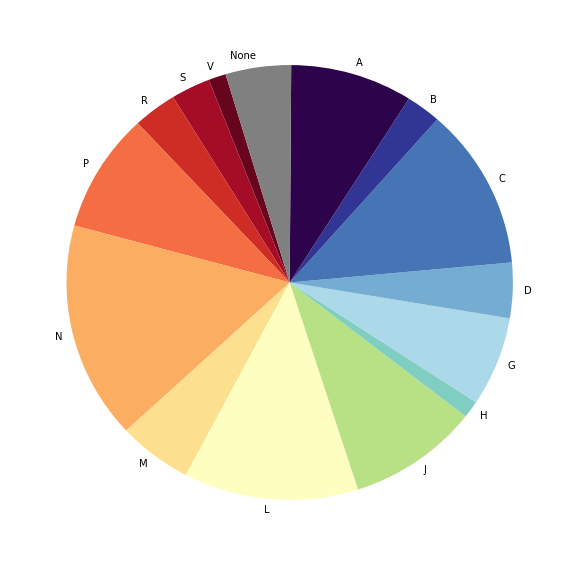

In [126]:

number_second_level = []
CLOUD_ATC = {}
classifications = []
fp = open('../data/CLOUD_Description/CLOUD_to_ATC.csv')
fp.next()
for line in fp:
    tmp = line.strip().split(',')
    CLOUD_ATC[tmp[0]] = tmp[2].split(';')
    classifications.extend(tmp[2].split(';'))
    number_second_level.append(len(tmp[3].split(';')))
sizes = []
labels = []

different_ATC = list(set(classifications))
different_ATC.sort(reverse=True)


for d in different_ATC:
    
    
    if d =='':
        labels.append('None')
    else:
        labels.append(d)
    sizes.append(classifications.count(d)/float(len(classifications)))
 
colors = ['#67051F','#A50C26','#CE2D26','#F46D43','#FBAE61','#FCE090','#FDFEBF','#B8E186','#80CDC1','#ABD9E9','#74ADD1','#4575B4','#313695','#2D034B','grey']

                               
                               
plt.hist(number_second_level,bins=10, color='#38405E')
#plt.show()
plt.axvline(np.mean(number_second_level),ls='--',c='grey')
plt.savefig('../results/CLOUD_Description/Number_Second_ATC_classes.pdf', format='pdf')
plt.close()
#sizes, labels = zip(*sorted(zip(sizes, labels)))

#print labels

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
#pie_wedge_collection = ax.pie(sizes,colors=colors, labels=labels, labeldistance=1.05, startangle=107,autopct='%1.1f%%')

pie_wedge_collection = ax.pie(sizes,colors=colors, labels=labels, labeldistance=1.05, startangle=106.7)

#for pie_wedge in pie_wedge_collection[0]:
#    pie_wedge.set_edgecolor('white')

#for pie_wedge in pie_wedge_collection[2]:
#    pie_wedge.set_color('white')

#plt.savefig('../results/CLOUD_Description/ATC_Classes.pdf', format='pdf')
#plt.close()


fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
#pie_wedge_collection = ax.pie(sizes,colors=colors, labels=labels, labeldistance=1.05, startangle=107,autopct='%1.1f%%')

pie_wedge_collection = ax.pie(sizes,colors=colors, labeldistance=1.05, startangle=106.7)

#for pie_wedge in pie_wedge_collection[0]:
#    pie_wedge.set_edgecolor('white')

#for pie_wedge in pie_wedge_collection[2]:
#    pie_wedge.set_color('white')

plt.savefig('../results/CLOUD_Description/ATC_Classes_NoLabel.pdf', format='pdf')
plt.close()

## KeGG description

In [25]:
from Bio.KEGG import REST

print 'Get Kegg pathways'

human_pathways = REST.kegg_list("pathway", "hsa").read()
# Filter all human pathways
pathways = {}
all_pathways = []
for line in human_pathways.rstrip().split("\n"):
    entry, description = line.split("\t")
    all_pathways.append(entry)

for pathway in all_pathways:
    pathway_file = REST.kegg_get(pathway).read()  # q
    
    for line in pathway_file.rstrip().split("\n"):
        section = line[:12].strip()  # section names are within 12 columns
        if section == 'CLASS':
            if ';' in line:
                Superclass, Subclass = line[12:].split("; ")
    pathways[pathway] = {}
    pathways[pathway]['Superclass'] = Superclass
    pathways[pathway]['Subclass'] = Subclass
   
print 'Finished getting all KeGG Pathways'

fp = open('../results/CLOUD_Description/KeGG_PathwayList.tsv','w')
fp.write('KeGGPathway\tSuperclass\tSubclass\n')
for p in pathways:
    fp.write(p+'\t'+pathways[p]['Superclass']+'\t'+pathways[p]['Subclass']+'\n')
fp.close()

Get Kegg pathways


KeyboardInterrupt: 

In [26]:
CLOUD_KeGG = {}
pathways_covered = []
directly_covered =[]
fp = open('../data/CLOUD_Description/CLOUD_to_KeGG_Pathways.csv')
fp.next()
for line in fp:
    tmp = line.strip().split(',')
    CLOUD_KeGG[tmp[0]] = {'Direct':['path:' + x for x in tmp[2].split(';') if x != ''],'Indirect':[x for x in tmp[3].split(';') if x !='']}
    
    directly_covered.extend(['path:' + x for x in tmp[2].split(';')])
    
    pathways_covered.extend(['path:' + x for x in tmp[2].split(';')])
    pathways_covered.extend([x for x in tmp[3].split(';') if x !=''])

#print pathways_covered    

pathways_covered = list(set(pathways_covered))    
directly_covered = list(set(directly_covered))  



all_Pathways = pathways.keys()
print 'All Human pathways: %d' %len(all_pathways)
print 'All Pathways covered by CLOUD (can include others e.g. bacterial pathways): %d' %len(pathways_covered)


direct_cov = len(set(all_pathways).intersection(set(directly_covered)))
indirect_cov = len(set(all_pathways).intersection(set(pathways_covered)))
not_cov = (len(all_pathways) - len(set(all_pathways).intersection(set(pathways_covered))))

print 'Directly covered: %d' %direct_cov
print 'Indirectly covered: %d' %indirect_cov
print 'Not covered: %d' %not_cov


# Data to plot
labels = 'Direct', 'Indirect','Not Covered'
sizes = [direct_cov, indirect_cov-direct_cov,not_cov]
colors = ['#2ca25f', '#99d8c9','grey']

# Plot
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.savefig('../results/CLOUD_Description/KeGG_Coverage.pdf', format='pdf')
plt.close()

# Plot
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes, colors=colors)
plt.savefig('../results/CLOUD_Description/KeGG_Coverage_NoLabel.pdf', format='pdf')
plt.close()


All Human pathways: 330
All Pathways covered by CLOUD (can include others e.g. bacterial pathways): 303
Directly covered: 97
Indirectly covered: 293
Not covered: 37


In [27]:
pathway_annotations = []
pathway_annotations_directOnly = []
for c in CLOUD_KeGG:
    paths = CLOUD_KeGG[c]['Direct']
    
    pathway_annotations_directOnly.append(len(set(paths)))
    paths.extend(CLOUD_KeGG[c]['Indirect'])
    
    pathway_annotations.append(len(set(paths)))

    
plt.hist(pathway_annotations,bins=10, color='#99d8c9')
plt.axvline(np.mean(pathway_annotations),ls='--',c='grey')
plt.savefig('../results/CLOUD_Description/Number_KeGG_Annotations_All.pdf', format='pdf')
plt.close()


plt.hist(pathway_annotations_directOnly,bins=10, color='#2ca25f')
plt.axvline(np.mean(pathway_annotations_directOnly),ls='--',c='grey')
plt.savefig('../results/CLOUD_Description/Number_KeGG_Annotations_DirectOnly.pdf', format='pdf')
plt.close()

In [28]:
superclasses = []
subclasses = []
for c in CLOUD_KeGG:
    for p in CLOUD_KeGG[c]['Direct']:
        if pathways.has_key(p):
            superclasses.append(pathways[p]['Superclass'])
            subclasses.append(pathways[p]['Subclass'])
            
superclass_names = list(set(superclasses))

sizes = []
labels = []
for n in superclass_names:
    labels.append(n)
    sizes.append(superclasses.count(n)/float(len(superclasses)))

colors = ['#7fc97f','#beaed4','#fdc086','#ffff99','#386cb0','#f0027f']

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes,colors=colors, labels=labels, autopct='%1.1f%%')
plt.savefig('../results/CLOUD_Description/Direct_SuperClass.pdf', format='pdf')
plt.close()

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes,colors=colors)
plt.savefig('../results/CLOUD_Description/Direct_SuperClass_NoLabel.pdf', format='pdf')
plt.close()



subclass_names = list(set(subclasses))
sizes = []
labels = []
for n in subclass_names:
    labels.append(n)
    sizes.append(subclasses.count(n)/float(len(subclasses)))
    
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig('../results/CLOUD_Description/Direct_SubClass.pdf', format='pdf')
plt.close()

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes)
plt.savefig('../results/CLOUD_Description/Direct_SubClass_NoLabel.pdf', format='pdf')
plt.close()

In [29]:
superclasses = []
subclasses = []
for c in CLOUD_KeGG:
    for p in CLOUD_KeGG[c]['Indirect']:
        if pathways.has_key(p):
            superclasses.append(pathways[p]['Superclass'])
            subclasses.append(pathways[p]['Subclass'])
            
superclass_names = list(set(superclasses))
sizes = []
labels = []
for n in superclass_names:
    labels.append(n)
    sizes.append(superclasses.count(n)/float(len(superclasses)))
    
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes,colors=colors, labels=labels, autopct='%1.1f%%')
plt.savefig('../results/CLOUD_Description/Indirect_SuperClass.pdf', format='pdf')
plt.close()

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes,colors=colors)
plt.savefig('../results/CLOUD_Description/Indirect_SuperClass_NoLabel.pdf', format='pdf')
plt.close()


subclass_names = list(set(subclasses))
sizes = []
labels = []
for n in subclass_names:
    labels.append(n)
    sizes.append(subclasses.count(n)/float(len(subclasses)))
    
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.savefig('../results/CLOUD_Description/Indirect_SubClass.pdf', format='pdf')
plt.close()

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes)
plt.savefig('../results/CLOUD_Description/Indirect_SubClass_NoLabel.pdf', format='pdf')
plt.close()

## Drug Target (General)

In [158]:
CLOUD_GeneralTarget = {}
General_Targets = []
fp = open('../data/CLOUD_Description/CLOUD_to_MechanismOfAction.csv')
fp.next()
for line in fp:
    tmp = line.strip().split(',')
    CLOUD_GeneralTarget[tmp[0]] = tmp[2]
    General_Targets.append(tmp[2])
    
    
big_categories = ['GPCR','oxidoreductase','ion channel','transferase','hydrolase','nuclear receptor','DNA','neurotransmitter transporter','ion transporter','microtubule','Kinase']
    
General_target_Names = list(set(General_Targets))
General_target_Names.remove('unknown')
sizes = []
labels = []
other_size = 0

other_sizes = []
other_labels = []
for n in General_target_Names:
    
    if n in big_categories:
        if n not in ['DNA','GPCR']:
            labels.append(n.title() )
        else:
             labels.append(n)
        sizes.append(General_Targets.count(n)/float(len(General_Targets)))
    else:
        other_size = other_size + General_Targets.count(n)/float(len(General_Targets))
        other_labels.append(n.title() )
        other_sizes.append(General_Targets.count(n)/float(len(General_Targets)))


    
sizes, labels = zip(*sorted(zip(sizes, labels), reverse=True))
sizes = list(sizes)
labels = list(labels)

sizes.append(other_size)
labels.append('Other')

sizes.append(General_Targets.count('unknown')/float(len(General_Targets)))
labels.append('Unkown')

#print labels

colors = ['#7f2e34','#cf8863','#bfb18d','#849c7a','#62795e','#e5bc7b','#dac48e','#d6ab5a','#a36e35','#f7c23b','#dcd3a9','#64c6c0','lightgrey']
#colors = ['#67051F','#A50C26','#CE2D26','#F46D43','#FBAE61','#FCE090','#FDFEBF','#B8E186','#80CDC1','#ABD9E9','#74ADD1','#4575B4','lightgrey']


fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes,colors=colors, labels=labels, autopct='%1.1f%%',startangle=90, counterclock = False)
plt.savefig('../results/CLOUD_Description/CLOUD_General_TargetClasses.pdf', format='pdf')
plt.close()

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(sizes,colors=colors, startangle=90, counterclock = False)
plt.savefig('../results/CLOUD_Description/CLOUD_General_TargetClasses_NoLabel.pdf', format='pdf')
plt.close()

In [159]:
final_other_sizes = []
for o in other_sizes:
    final_other_sizes.append(o/sum(other_sizes))


colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
    
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(final_other_sizes,colors=colors, labels=other_labels, autopct='%1.1f%%',startangle=90, counterclock = False)
plt.savefig('../results/CLOUD_Description/CLOUD_General_OtherTargetClass.pdf', format='pdf')
plt.close()


fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)
pie_wedge_collection = ax.pie(final_other_sizes,colors=colors, startangle=90, counterclock = False)
plt.savefig('../results/CLOUD_Description/CLOUD_General_OtherTargetClass_NoLabel.pdf', format='pdf')
plt.close()

## Disease

In [195]:
CLOUD_Disease = {}
fp = open('../data/CLOUD_Description/CLOUD_to_Disease.csv')
fp.next()
disease_annotations = []
for line in fp:
    tmp = line.strip().split(',')
    disease_annotations.append(len(tmp[1].split(';')))
    
    
plt.hist(disease_annotations,bins=10, color='#38405E')
plt.axvline(np.mean(disease_annotations),ls='--',c='grey')
plt.savefig('../results/CLOUD_Description/Number_Disease_Annotations.pdf', format='pdf')
plt.close()

### FDA approved

In [12]:
cloud_to_drugBank = {}
fp = open('../data/CLOUD_Description/CLOUD_DrugBank_PubChem_Chembl.csv')
for line in fp:
    tmp = line.strip().split(',')
    cloud_to_drugBank[tmp[0]] = tmp[1]

    

DrugBank = nx.read_gml('../data/CLOUD_Description/Drugbank_2018-07-03_CLOUD_Only.gml')

clouds = CLOUD_annotations.keys()
clouds.sort()
for cloud in clouds:
    print cloud + ': ' + DrugBank.node[cloud_to_drugBank[cloud]]['Approved']

CLOUD001: False
CLOUD002: True
CLOUD003: True
CLOUD004: True
CLOUD005: True
CLOUD006: True
CLOUD007: True
CLOUD008: True
CLOUD009: True
CLOUD010: True
CLOUD011: True
CLOUD012: True
CLOUD013: True
CLOUD014: False
CLOUD015: True
CLOUD016: True
CLOUD017: True
CLOUD018: True
CLOUD019: True
CLOUD020: True
CLOUD021: True
CLOUD022: True
CLOUD023: True
CLOUD024: True
CLOUD025: True
CLOUD026: True
CLOUD027: True
CLOUD028: True
CLOUD029: True
CLOUD030: True
CLOUD031: True
CLOUD032: True
CLOUD033: True
CLOUD034: True
CLOUD035: True
CLOUD036: True
CLOUD037: True
CLOUD038: True
CLOUD039: True
CLOUD040: True
CLOUD041: True
CLOUD042: True
CLOUD043: True
CLOUD044: True
CLOUD045: True
CLOUD046: True
CLOUD047: True
CLOUD048: False
CLOUD049: True
CLOUD050: True
CLOUD051: True
CLOUD052: True
CLOUD053: True
CLOUD054: True
CLOUD055: True
CLOUD056: True
CLOUD057: True
CLOUD058: True
CLOUD059: True
CLOUD060: True
CLOUD061: True
CLOUD062: True
CLOUD063: True
CLOUD064: True
CLOUD065: True
CLOUD066: True
CLOUD06